In [91]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as pe
import plotly.graph_objects as pg
import numpy as np

In [134]:
df = pd.read_csv('pizza_sales.csv')
df.head()
# df.columns

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [3]:
#1 total revenue made on sales

# relevant column data  ---- > total_price

total_price_sum = df['total_price'].sum()

print(f'The total revenue made in sales is {total_price_sum}')

The total revenue made in sales is 817860.05


In [4]:
#2 Average revenue

avg_rev = df['total_price'].mean().round(2)

print(f'The average revenue made is {avg_rev}')

The average revenue made is 16.82


In [5]:
#3 Total number of orders made

total_orders = df['order_id'].nunique()
print(f'The total number of orders is {total_orders}')

The total number of orders is 21350


In [6]:
#4 What is the average order value

total_orders = df['order_id'].nunique()
total_price_sum = df['total_price'].sum()
avg_ord_val = (total_price_sum / total_orders).round(2)

print(f'The Average order value is {avg_ord_val}')

The Average order value is 38.31


The total quantity sold is 49574


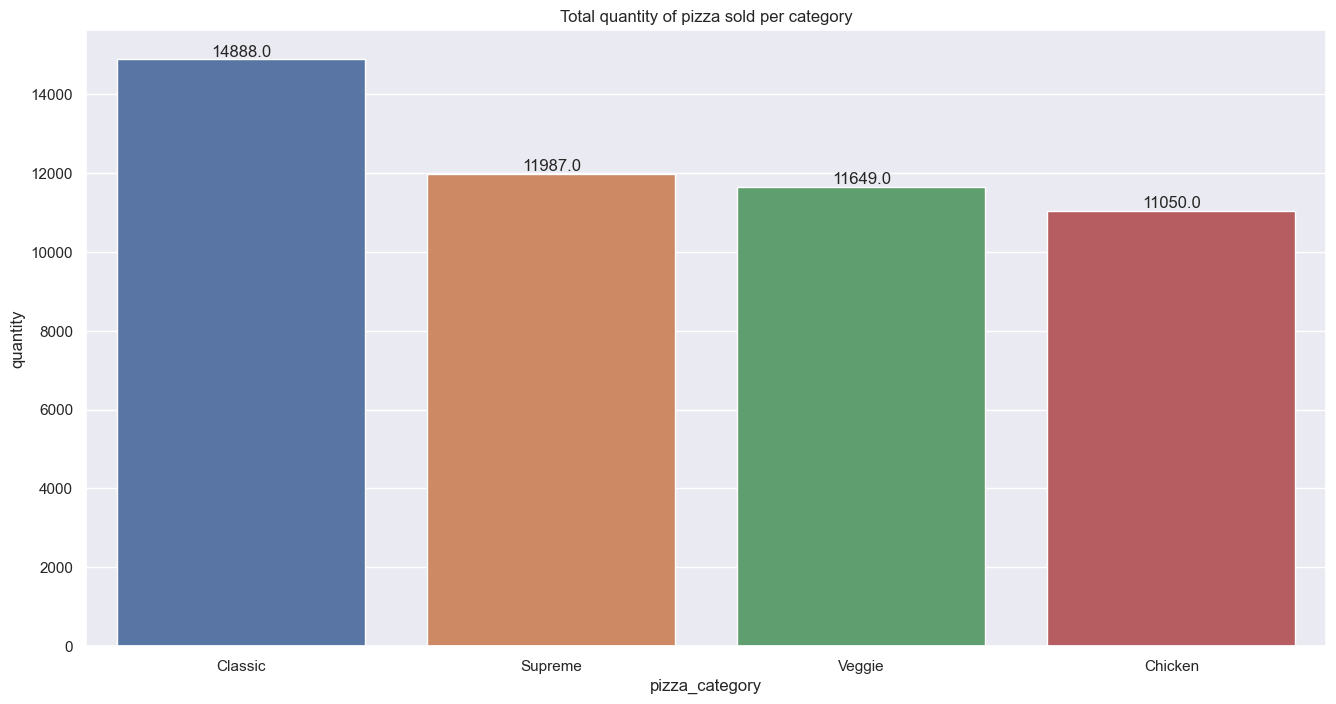

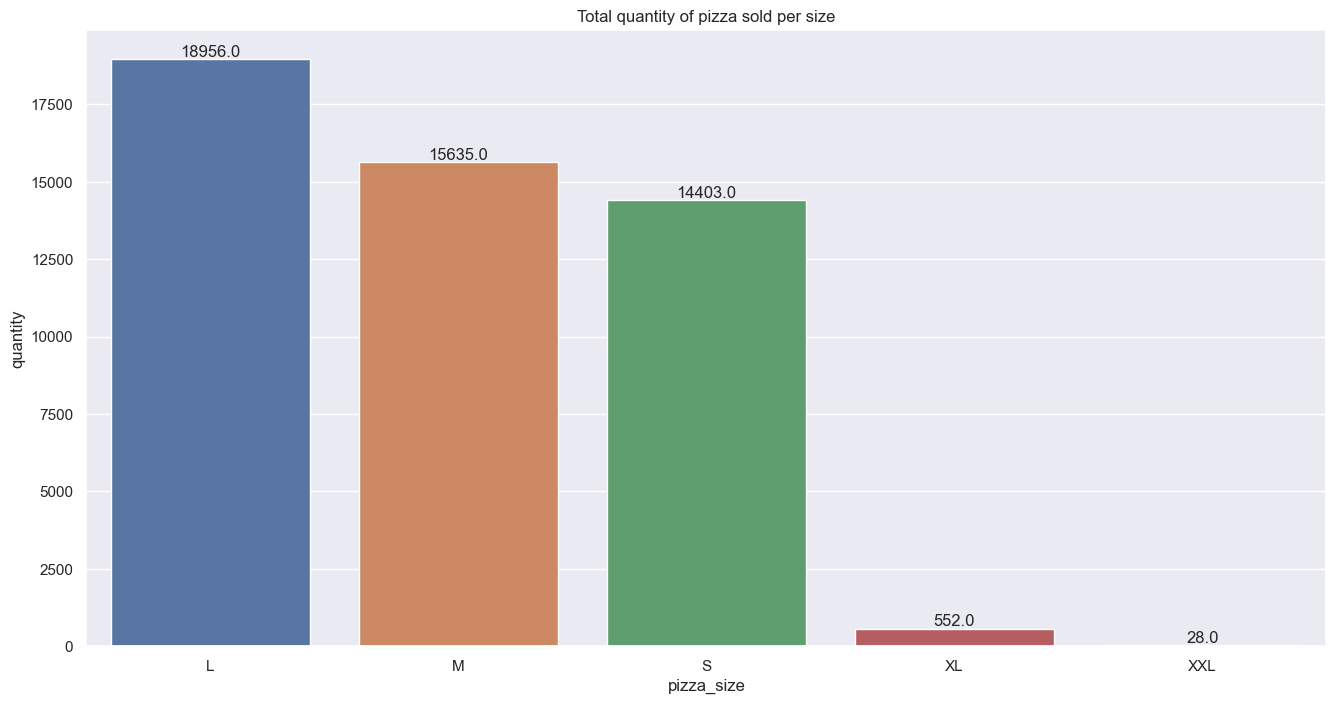

In [133]:
#5 What is total quantity sold, patterns and trends

total_quant = df['quantity'].sum()
print(f'The total quantity sold is {total_quant}')

#dist plot, scatterplot,reglpot

#Total quantity per category
quant_per_cat = df.groupby('pizza_category')[['quantity']].sum().reset_index().sort_values(by = 'quantity', ascending = False)
plt.figure(figsize= (16,8))
fig = sns.barplot(quant_per_cat, x = 'pizza_category', y = 'quantity')
plt.title('Total quantity of pizza sold per category')
fig.bar_label(fig.containers[0], fmt = '%.1f')
plt.show()

#Total quantity per size
quant_per_size = df.groupby('pizza_size')[['quantity']].sum().reset_index().sort_values(by = 'quantity', ascending = False)
plt.figure(figsize= (16,8))
fig2 = sns.barplot(quant_per_size, x = 'pizza_size', y = 'quantity')
plt.title('Total quantity of pizza sold per size')
fig2.bar_label(fig2.containers[0], fmt = '%.1f')
plt.show()



In [128]:
# 6 Identifying the pizza size that generated the highest sales in the first quarter of the year


#Convert the order_date column from object type to datetime
df['order_date'] = pd.to_datetime(df['order_date'], format = "%d-%m-%Y",errors='coerce' )
df[['order_date']]


# filter dataframe for data in the first quarter of the year
day = pd.to_datetime('2015-04-01',format = "%Y-%m-%d")
first_qurt = df[df['order_date'] < day]

#pizza that generated sales the higest sales
new = first_qurt.groupby('pizza_size')[['total_price']].sum().reset_index().sort_values(by = 'total_price', ascending = False)

#Visualiztaion using a pie chart in plotly
fig = pe.pie(new, names = 'pizza_size', values = 'total_price', color = 'pizza_size', title='Pizza size sales for first quarter')
fig.update_layout(title_x = 0.5)
fig.show()

In [129]:
#7 Determining the pizza category that recorded the highest sales in December

#filter for December date range

dec_filter = pd.to_datetime('2015-12-01', format = "%Y-%m-%d", errors = "coerce")
Dec = df[df['order_date'] >= dec_filter]

#Pizza category with the highest sales in december
pizza_cat = df.groupby('pizza_category')[['total_price']].sum().sort_values(by = 'total_price', ascending = False).idxmax().values[0]
print(f'The pizza category with the higest recorded sales in December is the {pizza_cat} pizza category') 

The pizza category with the higest recorded sales in December is the Classic pizza category


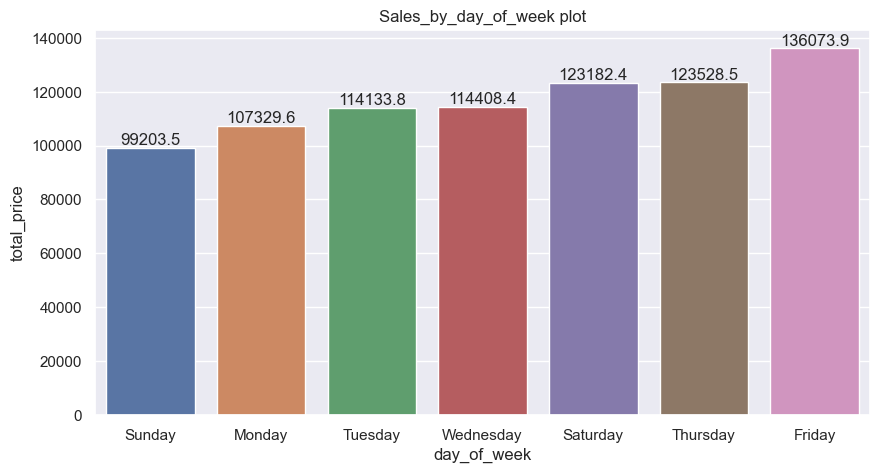

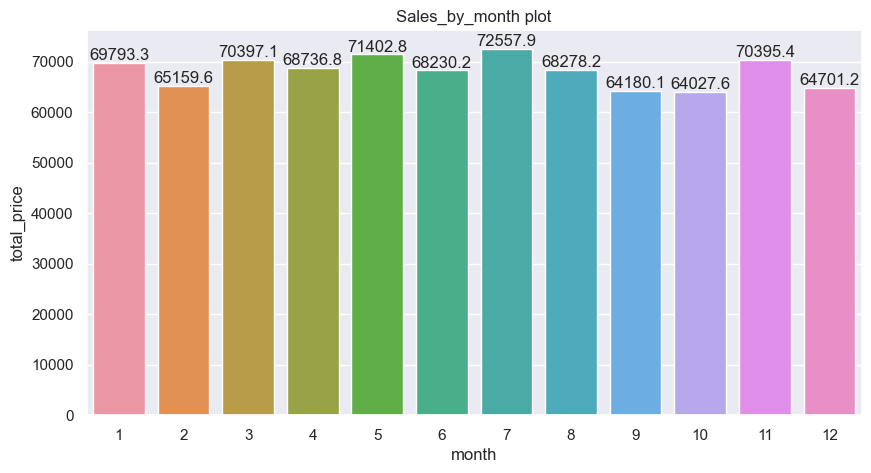

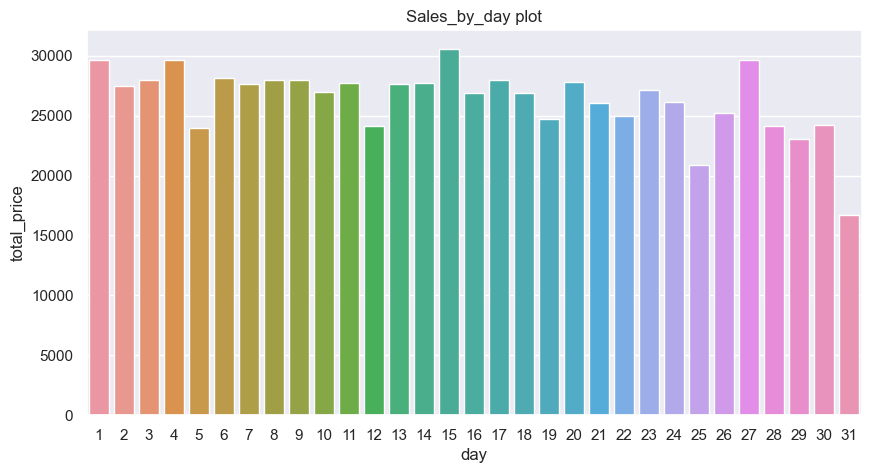

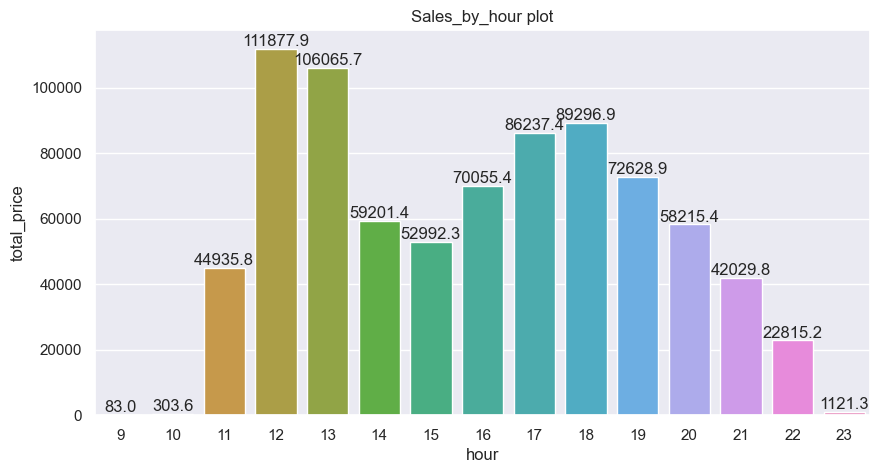

In [114]:
#8 Analyze sales trends across different days of the week, months, days, and time periods.

# bins = pd.date_range(start='2015-01-01', end='2016-02-01', freq='M')
# months = pd.cut(x = df['order_date'], bins = bins,labels= ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September','October','November','December'], right=False)
# df['months'] = months

#Segment data into weekdays, months, time periods

# sales_per_month = df.groupby('')


df['order_date'] = pd.to_datetime(df['order_date'])
df['order_time'] = pd.to_datetime(df['order_time'])



df['day_of_week'] = df['order_date'].dt.day_name()
df['month'] = df['order_date'].dt.month
df['day'] = df['order_date'].dt.day
df['hour'] = df['order_time'].dt.hour
# df['week'] = df['order_date'].dt




# Sales by Day of the Week
sales_by_day_of_week = df.groupby('day_of_week')[['total_price']].sum().reset_index().sort_values(by = 'total_price', ascending = True)
sns.set(style = 'darkgrid')
plt.figure(figsize= (10,5))
fig = sns.barplot(sales_by_day_of_week, x = 'day_of_week', y = 'total_price')
plt.title('Sales_by_day_of_week plot')
fig.bar_label(fig.containers[0], fmt = '%.1f')
plt.show()
    
 
# Sales by Month
sales_by_month = df.groupby('month')[['total_price']].sum().reset_index().sort_values(by = 'total_price', ascending = True)
sns.set(style = 'darkgrid')
plt.figure(figsize= (10,5))
fig2 = sns.barplot(sales_by_month, x = 'month', y = 'total_price')
plt.title('Sales_by_month plot')
fig2.bar_label(fig2.containers[0], fmt = '%.1f')
plt.show()

# Sales by Day
sales_by_day = df.groupby('day')[['total_price']].sum().reset_index().sort_values(by = 'total_price', ascending = True)
sns.set(style = 'darkgrid')
plt.figure(figsize= (10,5))
fig3 = sns.barplot(sales_by_day, x = 'day' , y ='total_price')
plt.title('Sales_by_day plot')
# fig3.bar_label(fig3.containers[0], fmt = '%.1f')
plt.show()

# Sales by Hour
sales_by_hour = df.groupby('hour')[['total_price']].sum().reset_index().sort_values(by = 'total_price', ascending = True)
sns.set(style = 'darkgrid')
plt.figure(figsize= (10,5))
fig4 = sns.barplot(sales_by_hour, x = 'hour', y = 'total_price')
plt.title('Sales_by_hour plot')
fig4.bar_label(fig4.containers[0], fmt = '%.1f')
plt.show()

#Convert data in order_time column to time format to be usable

time_periods = [sales_by_month, sales_by_day_of_week, sales_by_day,sales_by_hour]


# creation of sublpots for each category of analysis
#sales per week
#sales per month
#sales per days
#sales for the different time periods of the day. Establishing time bins of either(morning, afternoon and evening), (per hour), (am,pm)


In [18]:
#9 Identifying which pizza size exhibits the highest turnover rate in terms of quantity  ordered. The pizza size that is ordered the most in terms of quantity

size_Df = df.groupby('pizza_size')[['quantity']].sum().reset_index().sort_values(by = 'quantity', ascending=False)
size_Df 


,pizza_size,quantity
0,L,18956
1,M,15635
2,S,14403
3,XL,552
4,XXL,28


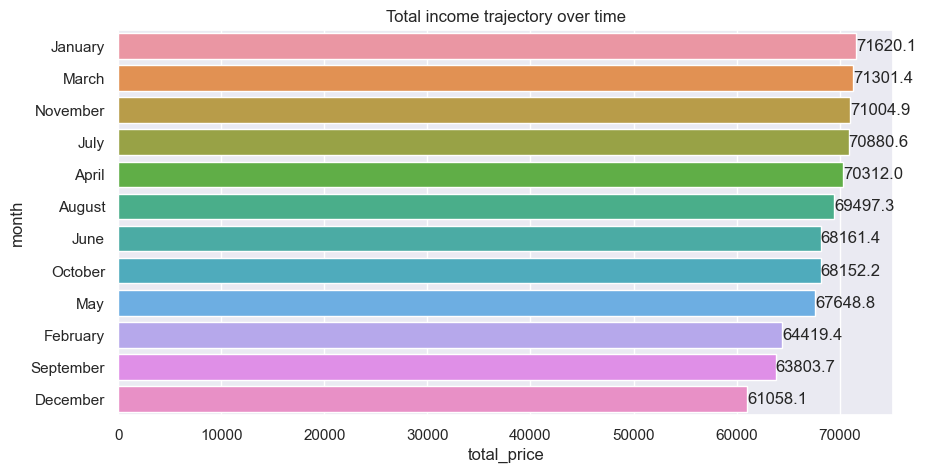

In [145]:
#10 Visualize the trajectory of total income over time and assessing how prices change as time progresses

#Data - total income, time | price_change(unit price) , time


df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = df['order_date'].dt.month_name()
order = df.groupby('month')[['total_price']].sum().reset_index().sort_values(by = 'total_price', ascending = False)

# plt.figure(figsize=(10,5))
# fig = sns.barplot(order, y = 'month', x = 'total_price',errorbar = ('ci' , 0))
# plt.title('Total income trajectory over time' )
# plt.bar_label(fig.containers[0], fmt = '%.1f')
# plt.show()

plt.figure(figsize=(10,5))
fig = sns.barplot(order, y = 'month', x = 'total_price',errorbar = ('ci' , 0))
plt.title('Total income trajectory over time' )
plt.bar_label(fig.containers[0], fmt = '%.1f')
plt.show()
# Linear regression/ Dist plot?